# Importing the Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from scipy.stats import mode

In [56]:
import pickle

# Importing the Dataset

In [4]:
train_dataset = pd.read_csv('train_ctrUa4K.csv')
test_dataset = pd.read_csv('test_lAUu6dG.csv')

# About Training Dataset

In [5]:
train_dataset.shape

(614, 13)

In [6]:
train_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
# checking the missing (null) values in each of the column 
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Analyzing

<AxesSubplot:title={'center':'Gender'}>

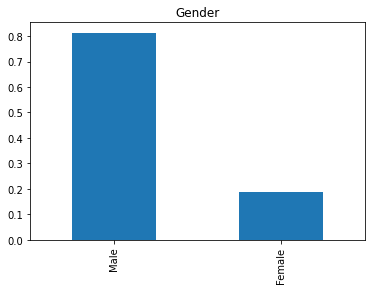

In [8]:
train_dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

<AxesSubplot:title={'center':'Married'}>

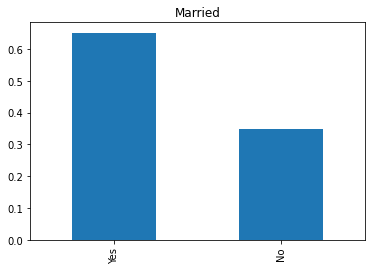

In [9]:
train_dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')

<AxesSubplot:title={'center':'Self_Employed'}>

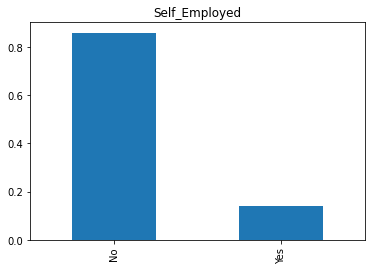

In [10]:
train_dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

<AxesSubplot:title={'center':'Credit_History'}>

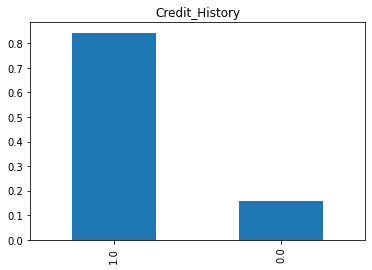

In [11]:
train_dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [12]:
# 80% of applicants are male
# around 65% of applicants are married
# aroung 15% of applicants are self-empoyed
# around 85% of applicants have good credit history

<AxesSubplot:title={'center':'Dependents'}>

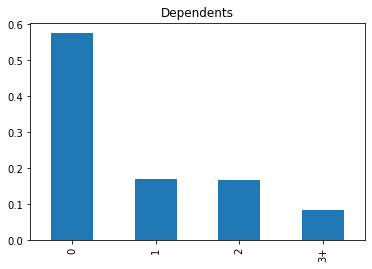

In [13]:
train_dataset['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

<AxesSubplot:title={'center':'Education'}>

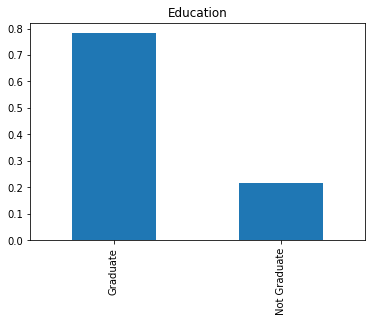

In [14]:
train_dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')

<AxesSubplot:title={'center':'Property_Area'}>

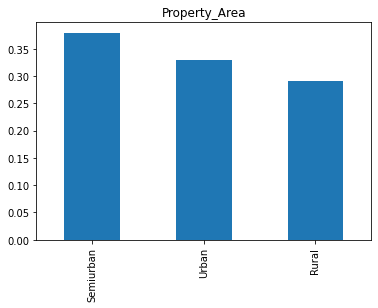

In [15]:
train_dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

In [16]:
# Most of the applicants have no dependents
# around 78% of applicants are graduated
# Most of the applicants are from semi urban area

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

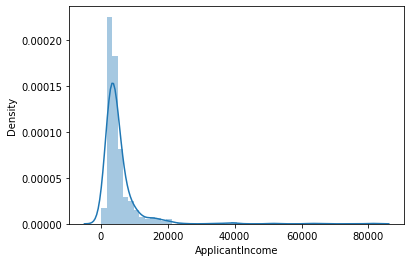

In [17]:
sns.distplot(train_dataset['ApplicantIncome'])

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

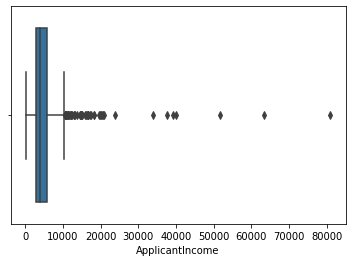

In [18]:
sns.boxplot(train_dataset['ApplicantIncome'])

In [19]:
# It can be inferred that the data is right skewed from the histogram plot
# therefore we have to make the data more normally distributed

In [20]:
# the boxplot confirms the outliers values which is due to the income diparity
# in the society

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

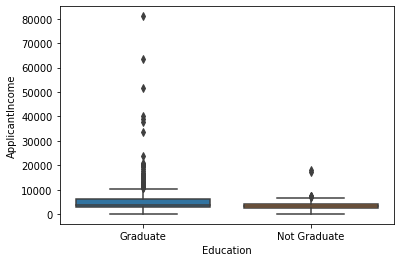

In [21]:
sns.boxplot(y = train_dataset['ApplicantIncome'], x= train_dataset['Education'])

In [22]:
# We can see graduates have very high incomes, which are appearing as outliers

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

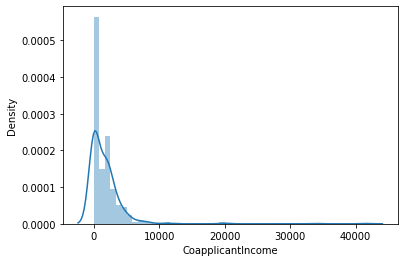

In [23]:
sns.distplot(train_dataset['CoapplicantIncome'])

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

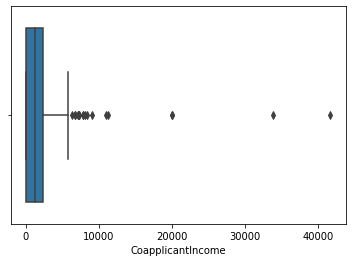

In [24]:
sns.boxplot(train_dataset['CoapplicantIncome'])

In [25]:
# The coapplicant income is also right skewed 
# the column of data is not normally distributed
# The coapplicant income also has very high no of outliers too, same as applicant income

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

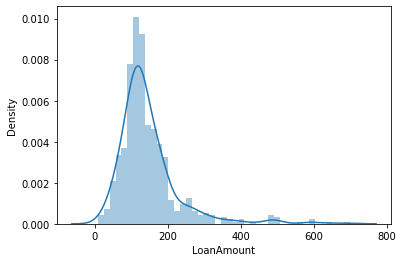

In [26]:
sns.distplot(train_dataset['LoanAmount'])

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

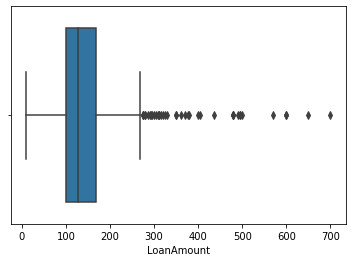

In [27]:
sns.boxplot(train_dataset['LoanAmount'])

In [28]:
# The Loanamount is fairly normally distributed
# but it also has very high no of outliers

# Filling the missing values

In [29]:
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
gender_miss_val = mode(train_dataset['Gender']).mode[0]
married_miss_val = mode(train_dataset['Married']).mode[0]
dependents_miss_val = mode(train_dataset['Dependents']).mode[0]
self_employed_miss_val = mode(train_dataset['Self_Employed']).mode[0]
credit_hist_miss_val = mode(train_dataset['Credit_History']).mode[0]

In [31]:
loan_amount_term_miss_val = mode(train_dataset['Loan_Amount_Term']).mode[0]

In [32]:
loan_amount_miss_val = train_dataset['LoanAmount'].median()

In [33]:
train_dataset['Gender'].fillna(gender_miss_val, inplace=True)
train_dataset['Married'].fillna(married_miss_val, inplace=True)
train_dataset['Dependents'].fillna(dependents_miss_val, inplace=True)
train_dataset['Self_Employed'].fillna(self_employed_miss_val, inplace=True)
train_dataset['LoanAmount'].fillna(loan_amount_miss_val, inplace=True)
train_dataset['Loan_Amount_Term'].fillna(loan_amount_term_miss_val, inplace=True)
train_dataset['Credit_History'].fillna(credit_hist_miss_val, inplace=True)

In [34]:
train_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Adding some new columns in the train dataset

In [35]:
train_dataset['Loan_amount_log'] = np.log(train_dataset['LoanAmount'])

In [36]:
train_dataset['Total_income'] = train_dataset['ApplicantIncome'] + train_dataset['CoapplicantIncome']

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_income', ylabel='Density'>

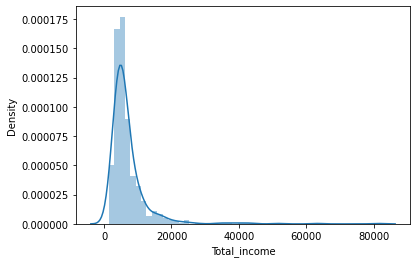

In [37]:
sns.distplot(train_dataset['Total_income'])

In [38]:
# as the total income is also right skewed so we are making the log transformation of this
# and adding into the training set

In [39]:
train_dataset['Total_income_log'] = np.log(train_dataset['Total_income'])

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_income_log', ylabel='Density'>

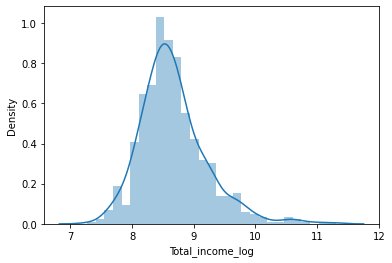

In [40]:
sns.distplot(train_dataset['Total_income_log'])

In [41]:
# This distribution is much more closely to normal distribution

# Encoding the Columns

In [42]:
gender_encoding = {'Male':0, 'Female':1}
married_encoding = {'No':0, 'Yes':1}
education_encoding = {'Not Graduate':0, 'Graduate':1}
self_employed_encoding = {'No':0, 'Yes':1}
dependents_encoding = {'0':0, '1':1, '2':2, '3+':4}
property_encoding = {'Rural':0, 'Semiurban':1, 'Urban':2}
loan_status_encoding = {'N':0, 'Y':1}

In [43]:
train_dataset.replace({'Gender':gender_encoding, 'Married':married_encoding, 'Education':education_encoding,
                      'Self_Employed':self_employed_encoding, 'Dependents':dependents_encoding, 'Property_Area':property_encoding}, 
                     inplace=True)

In [44]:
train_dataset.replace({'Loan_Status':loan_status_encoding}, inplace=True)

In [45]:
train_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_amount_log,Total_income,Total_income_log
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,5.231109,7583.0,8.933664


<AxesSubplot:>

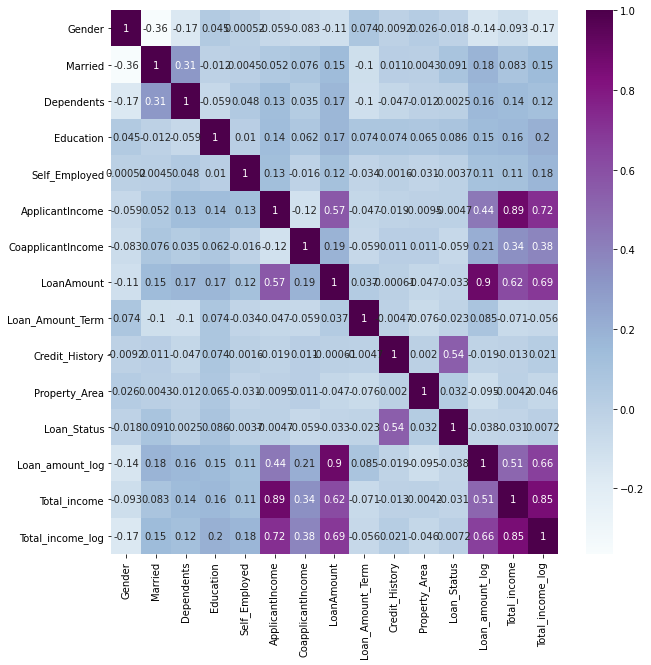

In [46]:
corr = train_dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, annot=True, cmap='BuPu')

In [47]:
# The X and Y will contain features and labels of the data

In [48]:
Y = train_dataset['Loan_Status']
X = train_dataset.drop(['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income', 'Loan_ID'], axis=1)

In [49]:
X

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_amount_log,Total_income_log
0,0,0,0,1,0,360.0,1.0,2,4.852030,8.674026
1,0,1,1,1,0,360.0,1.0,0,4.852030,8.714568
2,0,1,0,1,1,360.0,1.0,2,4.189655,8.006368
3,0,1,0,0,0,360.0,1.0,2,4.787492,8.505323
4,0,0,0,1,0,360.0,1.0,2,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,360.0,1.0,0,4.262680,7.972466
610,0,1,4,1,0,180.0,1.0,0,3.688879,8.320205
611,0,1,1,1,0,360.0,1.0,2,5.533389,9.025456
612,0,1,2,1,0,360.0,1.0,2,5.231109,8.933664


# Now we split the dataset and train it on various models

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [51]:
def classify(model , X, Y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=0)
    model.fit(X_train, y_train)
    print('Model Accuracy = {}'.format(model.score(X_valid, y_valid) * 100))
    cross_score = cross_val_score(model, X, Y, cv=5)
    print("Cross Validation score is :", np.mean(cross_score) * 100)

# First, Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
classify(LogisticRegression(), X, Y)

Model Accuracy = 87.09677419354838
Cross Validation score is : 80.9462881514061


C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_dict ={
    'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'multi_class':['auto', 'ovr', 'multinomial']
}

In [55]:
classifier_tuning = LogisticRegression()
grid_search = GridSearchCV(classifier_tuning, param_dict, cv=3, verbose=2,n_jobs=6, scoring='accuracy')
grid_search.fit(X, Y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'C': 1.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(multi_class='multinomial', solver='newton-cg')
0.8111190817790531


C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80948509 0.80785111        nan 0.68729476 0.68729476        nan
        nan 0.80948509        nan 0.68729476 0.80948509 0.80785111
 0.80948509 0.68729476 0.68729476        nan        nan        nan
        nan        nan 0.80948509 0.80785111        nan 0.68729476
 0.68729476        nan        nan 0.80948509        nan 0.68729476
 0.80948509 0.80785111 0.80948509 0.68729476 0.68729476        nan
        nan        nan        nan        nan 0.80948509 0.80785111
        nan 0.68729476 0.68729476        nan        nan        nan
        nan 0.68729476 0.80948509 0.80785111        nan 0.68729476
 0.68729476        nan        nan        nan        nan        nan
 0.80948509 0.80785111        nan 0.68729476 0.68729476        nan
        nan 0.80948509        nan 0.68729476 0.80948509 0.80785111
 0.80948509 0.68729476 0.68729476      

In [85]:
classify(LogisticRegression(multi_class='multinomial', solver='newton-cg'),
         X, Y)

Model Accuracy = 87.09677419354838
Cross Validation score is : 80.9462881514061


In [58]:
lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr_model.fit(X, Y)
filename = 'lr_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))

# Second, Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
classify(DecisionTreeClassifier(), X, Y)

Model Accuracy = 70.96774193548387
Cross Validation score is : 68.40197254431561


In [60]:
param_dict ={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'splitter':['best', 'random'],
    'min_samples_split':[1, 2, 4, 5, 7, 9, 11], 
    'max_features': ['int', 'auto', 'sqrt', 'log2']
}

In [61]:
classifier_tuning = DecisionTreeClassifier()
grid_search = GridSearchCV(classifier_tuning, param_dict, cv=3, verbose=2,n_jobs=6, scoring='accuracy')
grid_search.fit(X, Y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 3 folds for each of 2800 candidates, totalling 8400 fits
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=10,
                       min_samples_split=5)
0.8127371273712738


C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.68729476 0.68729476 0.68729476]
  warnings.warn(


In [62]:
classify(DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=20, 
                                min_samples_split=11), X, Y)

Model Accuracy = 87.09677419354838
Cross Validation score is : 77.35039317606291


In [63]:
dt_model = DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=20, min_samples_split=11)
dt_model.fit(X, Y)
filename = 'dt_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))

# Third, Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
classify(RandomForestClassifier(), X, Y)

Model Accuracy = 80.64516129032258
Cross Validation score is : 77.68759163001467


In [65]:
param_dict = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 20, 40, 60, 80, 90],
    'max_features': ['auto', 'sqrt', 'log2', 'int'],
    'min_samples_leaf': [1, 2, 3, 4, 5, 7],
    'min_samples_split': [2, 5, 8, 15],
    'n_estimators': [50, 100, 200, 300, 500], 
    'criterion': ['gini', 'entropy']
}

In [66]:
classifier_tuning = RandomForestClassifier()
grid_search = GridSearchCV(classifier_tuning, param_dict, cv=3, verbose=2,n_jobs=6, scoring='accuracy')
grid_search.fit(X, Y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 3 folds for each of 13440 candidates, totalling 40320 fits
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)
0.8159971305595409


C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80460705 0.80296509 0.8045911  ...        nan        nan        nan]
  warnings.warn(


In [67]:
classify( RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50), X, Y)

Model Accuracy = 85.48387096774194
Cross Validation score is : 80.13194722111156


In [68]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50)
rf_model.fit(X, Y)
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

# Fourth, KNN classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classify( KNeighborsClassifier(), X, Y)

Model Accuracy = 79.03225806451613
Cross Validation score is : 72.96014927362388


In [71]:
param_dict = {
    'n_neighbors': [5, 7, 10, 15, 20, 25, 30, 35],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1, 2],
    'metric':['minkowski', 'euclidean', 'manhattan']
}

In [72]:
classifier_tuning = KNeighborsClassifier()
grid_search = GridSearchCV(classifier_tuning, param_dict, cv=3, verbose=2,n_jobs=6, scoring='accuracy')
grid_search.fit(X, Y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
0.7508130081300813


In [73]:
classify(KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'), X, Y)

Model Accuracy = 79.03225806451613
Cross Validation score is : 73.93842463014794


In [74]:
knn_model = DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=20, min_samples_split=11)
knn_model.fit(X, Y)
filename = 'knn_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))

# Fifth, Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
classify(GaussianNB(), X, Y)

Model Accuracy = 87.09677419354838
Cross Validation score is : 80.45981607357056


In [88]:
param_dict = {'var_smoothing': np.logspace(0,-9, num=100)}

In [89]:
classifier_tuning = GaussianNB()
grid_search = GridSearchCV(classifier_tuning, param_dict, cv=3, verbose=2,n_jobs=6, scoring='accuracy')
grid_search.fit(X, Y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'var_smoothing': 2.310129700083158e-05}
GaussianNB(var_smoothing=2.310129700083158e-05)
0.8062410329985653


In [90]:
classify(GaussianNB(var_smoothing=2.310129700083158e-05) , X, Y)

Model Accuracy = 87.09677419354838
Cross Validation score is : 80.29588164734108


In [91]:
nb_model = GaussianNB(var_smoothing=2.310129700083158e-05)
nb_model.fit(X, Y)
filename = 'nb_model.sav'
pickle.dump(nb_model, open(filename, 'wb'))

# Now we preprocess the Test Dataset

In [92]:
test_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [93]:
test_dataset.shape

(367, 12)

In [94]:
test_dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [95]:
test_dataset['Gender'].fillna(gender_miss_val, inplace=True)
test_dataset['Married'].fillna(married_miss_val, inplace=True)
test_dataset['Dependents'].fillna(dependents_miss_val, inplace=True)
test_dataset['Self_Employed'].fillna(self_employed_miss_val, inplace=True)
test_dataset['LoanAmount'].fillna(loan_amount_miss_val, inplace=True)
test_dataset['Loan_Amount_Term'].fillna(loan_amount_term_miss_val, inplace=True)
test_dataset['Credit_History'].fillna(credit_hist_miss_val, inplace=True)

In [96]:
test_dataset['Loan_amount_log'] = np.log(test_dataset['LoanAmount'])

In [97]:
test_dataset['Total_income'] = test_dataset['ApplicantIncome'] + test_dataset['CoapplicantIncome']

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_income', ylabel='Density'>

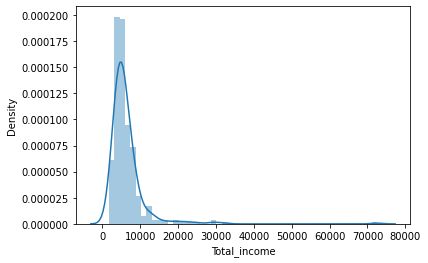

In [98]:
sns.distplot(test_dataset['Total_income'])

In [99]:
test_dataset['Total_income_log'] = np.log(test_dataset['Total_income'])

C:\Users\sidhant\anaconda3\envs\tf_2.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_income_log', ylabel='Density'>

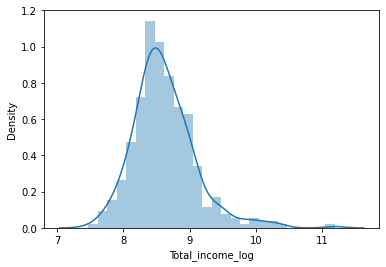

In [100]:
sns.distplot(test_dataset['Total_income_log'])

In [101]:
test_dataset.replace({'Gender':gender_encoding, 'Married':married_encoding, 'Education':education_encoding,
                      'Self_Employed':self_employed_encoding, 'Dependents':dependents_encoding, 'Property_Area':property_encoding}, 
                     inplace=True)

In [102]:
test_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_amount_log,Total_income,Total_income_log
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2,4.700480,5720,8.651724
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4.836282,4576,8.428581
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2,5.337538,6800,8.824678
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2,4.605170,4886,8.494129
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2,4.356709,3276,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,0,1,4009,1777,113.0,360.0,1.0,2,4.727388,5786,8.663196
363,LP002975,0,1,0,1,0,4158,709,115.0,360.0,1.0,2,4.744932,4867,8.490233
364,LP002980,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1,4.836282,5243,8.564649
365,LP002986,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0,5.062595,7393,8.908289


In [103]:
X_test = test_dataset.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income', 'Loan_ID'], axis=1)

In [104]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_amount_log,Total_income_log
0,0,1,0,1,0,360.0,1.0,2,4.700480,8.651724
1,0,1,1,1,0,360.0,1.0,2,4.836282,8.428581
2,0,1,2,1,0,360.0,1.0,2,5.337538,8.824678
3,0,1,2,1,0,360.0,1.0,2,4.605170,8.494129
4,0,0,0,0,0,360.0,1.0,2,4.356709,8.094378
...,...,...,...,...,...,...,...,...,...,...
362,0,1,4,0,1,360.0,1.0,2,4.727388,8.663196
363,0,1,0,1,0,360.0,1.0,2,4.744932,8.490233
364,0,0,0,1,0,360.0,1.0,1,4.836282,8.564649
365,0,1,0,1,0,360.0,1.0,0,5.062595,8.908289


# Now, make the submission file for each of the model and test its score, by uploading it on Solution Checker of Analytics Vidhya

In [107]:
def saving_to_submission(filename, predictions):
    sample_csv = pd.read_csv('sample_submission_49d68Cx.csv')
    sample_csv['Loan_Status'] = predictions
    full_filename = 'Submissions/' + filename
    sample_csv.to_csv(full_filename, index=False)

In [108]:
predictions = dt_model.predict(X_test)

In [110]:
prediction_temp = []
for i in range(predictions.shape[0]):
    if predictions[i] == 0:
        prediction_temp.append('N')
    else:
        prediction_temp.append('Y')

In [111]:
saving_to_submission('Decision_Tree_sub.csv', np.array(prediction_temp))

In [112]:
predictions = lr_model.predict(X_test)
prediction_temp = []
for i in range(predictions.shape[0]):
    if predictions[i] == 0:
        prediction_temp.append('N')
    else:
        prediction_temp.append('Y')
saving_to_submission('Logistic_Regression_sub.csv', np.array(prediction_temp))

In [113]:
predictions = rf_model.predict(X_test)
prediction_temp = []
for i in range(predictions.shape[0]):
    if predictions[i] == 0:
        prediction_temp.append('N')
    else:
        prediction_temp.append('Y')
saving_to_submission('Random_Forest_sub.csv', np.array(prediction_temp))

In [114]:
predictions = knn_model.predict(X_test)
prediction_temp = []
for i in range(predictions.shape[0]):
    if predictions[i] == 0:
        prediction_temp.append('N')
    else:
        prediction_temp.append('Y')
saving_to_submission('KNN_sub.csv', np.array(prediction_temp))

In [115]:
predictions = nb_model.predict(X_test)
prediction_temp = []
for i in range(predictions.shape[0]):
    if predictions[i] == 0:
        prediction_temp.append('N')
    else:
        prediction_temp.append('Y')
saving_to_submission('Naive_Bayes_sub.csv', np.array(prediction_temp))